### Utils

In [127]:
my_style = """
table {
  border-collapse: collapse;
}

th, td {
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {background-color: #f2f2f2;}
"""

def HTML_with_style(df):
    style = '<style>{}</style>'.format(my_style)
    df_html = df.to_html(index=False)

    return style + df_html

### Lab

##### OLLVM

Average Accuracy with OLLVM                       
                       Models  POJ Mean CodeNet Mean
0                         KNN  0.354137     0.356262
1               Random Forest  0.635463     0.607000
2                         SVM  0.281438     0.306975
3         Logistic Regression  0.412000     0.128850
4                         SGD  0.278612     0.231250
5                         MLP  0.283725     0.441575

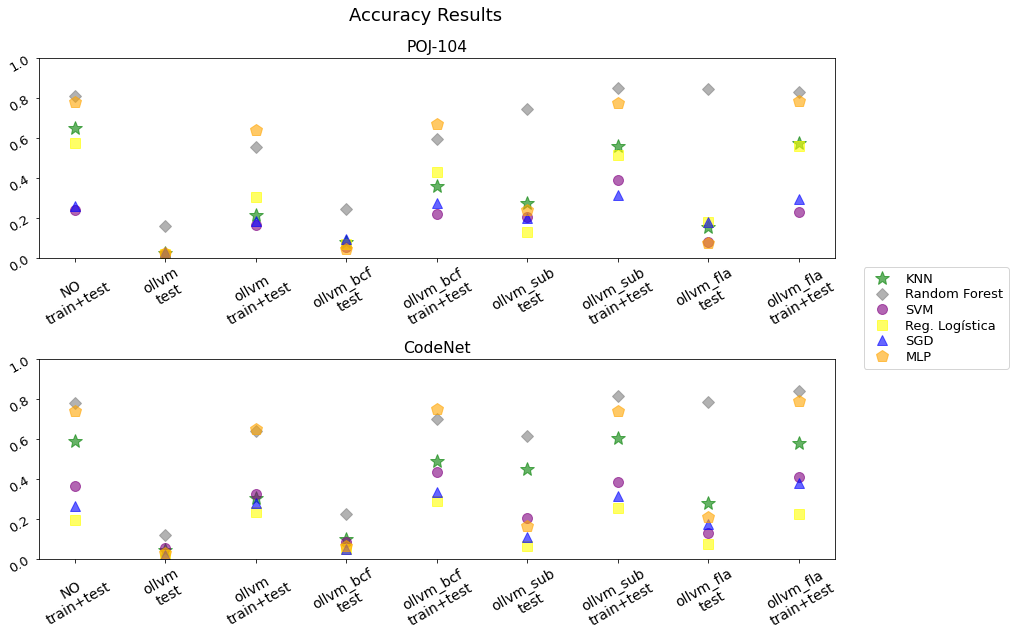

In [140]:
from IPython.display import display
import matplotlib.pyplot as plt
import pdfkit as pk
import pandas as pd
import numpy as np

poj = pd.read_csv("./data104.csv", skipinitialspace=True)
code = pd.read_csv("./codenet.csv", skipinitialspace=True)

fig, axs = plt.subplots(2,1,figsize=(12,9))
# fig, ax = plt.subplots(1,1,figsize=(12,8))

# plt.rcParams.update({'font.size': 14})
plt.rc('font', size=13)
# plt.rc('axes', labelsize=9)
plt.rc('xtick', labelsize=14)
plt.rc('figure', titlesize=18)

selectedCols = ["NO", "te ollvm","tr+te ollvm", "te ollvm_bcf","tr+te ollvm_bcf", "te ollvm_sub","tr+te ollvm_sub","te ollvm_fla","tr+te ollvm_fla", "type"]

def createAx(ax, df, metric):
    sample = df[df["type"] == metric][np.concatenate([selectedCols, ["model"]])]
    sel = ["NO", "te ollvm", "tr+te ollvm", "te ollvm_bcf", "tr+te ollvm_bcf", "te ollvm_sub", "tr+te ollvm_sub", "te ollvm_fla", "tr+te ollvm_fla"]
    sel_labels = ["NO\ntrain+test", "ollvm\ntest", "ollvm\ntrain+test", "ollvm_bcf\ntest", "ollvm_bcf\ntrain+test", "ollvm_sub\ntest", "ollvm_sub\ntrain+test", "ollvm_fla\ntest", "ollvm_fla\ntrain+test"]
    alpha=0.6
    models = ["knn", "random_forest", "svm", "reg_logistica", "sgd", "mlp"]
    det = [("green", 15, "*"), ("grey", 8, "D"), ("purple", 10, "o"), ("yellow", 10, "s"), ("blue", 10, "^"), ("orange", 12, "p")]

    k = 0
    for m in models:
        d = det[k]
        s = sample[sample["model"] == m][np.concatenate([sel, ["model"]])]
        s = s[sel].T
        s.columns = range(1)
        ax.plot(sel_labels, s[0],alpha=alpha, color=d[0], ms=d[1], marker=d[2], linestyle="None")
        ax.set_ylim([0,3700 if metric == "time" else 1])
        ax.tick_params(labelrotation=30)
        k += 1


createAx(axs[0], poj, "acc")
createAx(axs[1], code, "acc")
fig.legend(["KNN", "Random Forest", "SVM", "Reg. Logística", "SGD", "MLP"], handleheight=0.6, labelspacing=0.2, loc="center left", bbox_to_anchor=(1, 0.5))
# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, ("KNN", "Random Forest", "SVM", "Reg. Logística", "SGD", "MLP"), loc='center left', bbox_to_anchor=(1, 0.5))

axs[0].set_title("POJ-104")
axs[1].set_title("CodeNet")

fig.suptitle("Accuracy Results")
# fig.xticks(rotation=20)

fig.tight_layout()
# plt.savefig("pdfs/ollvm_{}.pdf".format("acc"), bbox_inches = 'tight')


sample = poj[poj["type"] == "precision"][np.concatenate([selectedCols, ["model"]])]
sample2 = code[code["type"] == "precision"][np.concatenate([selectedCols, ["model"]])]

file_name="pdfs/mean_acc.pdf"
sample = sample.loc[:, (sample.columns != "type") & (sample.columns != "NO")].set_index("model").T
sample2 = sample2.loc[:, (sample2.columns != "type") & (sample2.columns != "NO")].set_index("model").T
sample = sample.mean()
sample2 = sample2.mean()
sample = pd.DataFrame({'Models':["KNN", "Random Forest", "SVM", "Logistic Regression", "SGD", "MLP"], 'POJ Mean': sample.values, 'CodeNet Mean': sample2.values})
sample.columns = pd.MultiIndex.from_product([["Average Accuracy with OLLVM"], sample.columns])
display(sample)
# pk.from_string(HTML_with_style(sample), file_name)

##### O3

Average Accuracy with OLLVM                      
                       Models POJ Mean CodeNet Mean
0                         KNN  0.34860      0.30575
1               Random Forest  0.50535      0.44395
2                         SVM  0.22225      0.19505
3         Logistic Regression  0.34255      0.11195
4                         SGD  0.20670      0.15245
5                         MLP  0.25925      0.38185

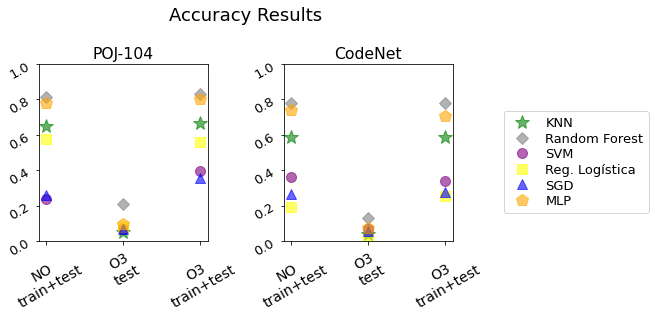

In [176]:
from IPython.display import display
import matplotlib.pyplot as plt
import pdfkit as pk
import pandas as pd
import numpy as np

poj = pd.read_csv("./data104.csv", skipinitialspace=True)
code = pd.read_csv("./codenet.csv", skipinitialspace=True)

fig, axs = plt.subplots(1,2,figsize=(7,4.5))
# fig, ax = plt.subplots(1,1,figsize=(12,8))

# plt.rcParams.update({'font.size': 14})
plt.rc('font', size=13)
# plt.rc('axes', labelsize=9)
plt.rc('xtick', labelsize=14)
plt.rc('figure', titlesize=18)

selectedCols = ["NO","te O3","tr+te O3", "type"]

def createAx(ax, df, metric):
    sample = df[df["type"] == metric][np.concatenate([selectedCols, ["model"]])]
    sel = ["NO","te O3","tr+te O3"]
    sel_labels = ["NO\ntrain+test", "O3\ntest", "O3\ntrain+test"]
    alpha=0.6
    models = ["knn", "random_forest", "svm", "reg_logistica", "sgd", "mlp"]
    det = [("green", 15, "*"), ("grey", 8, "D"), ("purple", 10, "o"), ("yellow", 10, "s"), ("blue", 10, "^"), ("orange", 12, "p")]

    k = 0
    for m in models:
        d = det[k]
        s = sample[sample["model"] == m][np.concatenate([sel, ["model"]])]
        s = s[sel].T
        s.columns = range(1)
        ax.plot(sel_labels, s[0],alpha=alpha, color=d[0], ms=d[1], marker=d[2], linestyle="None")
        ax.set_ylim([0,3700 if metric == "time" else 1])
        ax.tick_params(labelrotation=30)
        k += 1


createAx(axs[0], poj, "acc")
createAx(axs[1], code, "acc")
fig.legend(["KNN", "Random Forest", "SVM", "Reg. Logística", "SGD", "MLP"], handleheight=0.6, labelspacing=0.2, loc="center left", bbox_to_anchor=(1, 0.5))
# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, ("KNN", "Random Forest", "SVM", "Reg. Logística", "SGD", "MLP"), loc='center left', bbox_to_anchor=(1, 0.5))

axs[0].set_title("POJ-104")
axs[1].set_title("CodeNet")

fig.suptitle("Accuracy Results")
# fig.xticks(rotation=20)

fig.tight_layout()
# plt.savefig("pdfs/o3_{}.pdf".format("acc"), bbox_inches = 'tight')

### Tabela
sample = poj[poj["type"] == "f1"][np.concatenate([selectedCols, ["model"]])]
sample2 = code[code["type"] == "f1"][np.concatenate([selectedCols, ["model"]])]

file_name="pdfs/mean_acc.pdf"
sample = sample.loc[:, (sample.columns != "type") & (sample.columns != "NO")].set_index("model").T
sample2 = sample2.loc[:, (sample2.columns != "type") & (sample2.columns != "NO")].set_index("model").T
sample = sample.mean()
sample2 = sample2.mean()
sample = pd.DataFrame({'Models':["KNN", "Random Forest", "SVM", "Logistic Regression", "SGD", "MLP"], 'POJ Mean': sample.values, 'CodeNet Mean': sample2.values})
sample.columns = pd.MultiIndex.from_product([["Average Accuracy with OLLVM"], sample.columns])
display(sample)
# pk.from_string(HTML_with_style(sample), file_name)

##### Comb

Average Accuracy with OLLVM                       
                       Models  POJ Mean CodeNet Mean
0                         KNN  0.461800     0.421333
1               Random Forest  0.696633     0.660933
2                         SVM  0.240767     0.239800
3         Logistic Regression  0.510700     0.205200
4                         SGD  0.209400     0.182633
5                         MLP  0.410433     0.607833

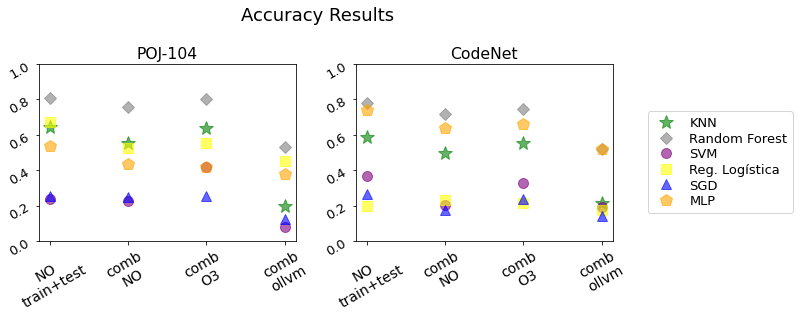

In [177]:
from IPython.display import display
import matplotlib.pyplot as plt
import pdfkit as pk
import pandas as pd
import numpy as np

poj = pd.read_csv("./data104.csv", skipinitialspace=True)
code = pd.read_csv("./codenet.csv", skipinitialspace=True)

fig, axs = plt.subplots(1,2,figsize=(9,4.5))
# fig, ax = plt.subplots(1,1,figsize=(12,8))

# plt.rcParams.update({'font.size': 14})
plt.rc('font', size=13)
# plt.rc('axes', labelsize=9)
plt.rc('xtick', labelsize=14)
plt.rc('figure', titlesize=18)

selectedCols = ["NO","comb-te NO","comb-te O3","comb-te OLLVM", "type"]

def createAx(ax, df, metric):
    sample = df[df["type"] == metric][np.concatenate([selectedCols, ["model"]])]
    sel = ["NO","comb-te NO","comb-te O3","comb-te OLLVM"]
    sel_labels = ["NO\ntrain+test", "comb\nNO", "comb\nO3", "comb\nollvm"]
    alpha=0.6
    models = ["knn", "random_forest", "svm", "reg_logistica", "sgd", "mlp"]
    det = [("green", 15, "*"), ("grey", 8, "D"), ("purple", 10, "o"), ("yellow", 10, "s"), ("blue", 10, "^"), ("orange", 12, "p")]

    k = 0
    for m in models:
        d = det[k]
        s = sample[sample["model"] == m][np.concatenate([sel, ["model"]])]
        s = s[sel].T
        s.columns = range(1)
        ax.plot(sel_labels, s[0],alpha=alpha, color=d[0], ms=d[1], marker=d[2], linestyle="None")
        ax.set_ylim([0,3700 if metric == "time" else 1])
        ax.tick_params(labelrotation=30)
        k += 1

metric="recall"
createAx(axs[0], poj, metric)
createAx(axs[1], code, metric)
fig.legend(["KNN", "Random Forest", "SVM", "Reg. Logística", "SGD", "MLP"], handleheight=0.6, labelspacing=0.2, loc="center left", bbox_to_anchor=(1, 0.5))
# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, ("KNN", "Random Forest", "SVM", "Reg. Logística", "SGD", "MLP"), loc='center left', bbox_to_anchor=(1, 0.5))

axs[0].set_title("POJ-104")
axs[1].set_title("CodeNet")

fig.suptitle("Accuracy Results")
# fig.xticks(rotation=20)

fig.tight_layout()
# plt.savefig("pdfs/comb_{}.pdf".format(metric), bbox_inches = 'tight')

### Tabela
sample = poj[poj["type"] == metric][np.concatenate([selectedCols, ["model"]])]
sample2 = code[code["type"] == metric][np.concatenate([selectedCols, ["model"]])]

file_name="pdfs/mean_acc.pdf"
sample = sample.loc[:, (sample.columns != "type") & (sample.columns != "NO")].set_index("model").T
sample2 = sample2.loc[:, (sample2.columns != "type") & (sample2.columns != "NO")].set_index("model").T
sample = sample.mean()
sample2 = sample2.mean()
sample = pd.DataFrame({'Models':["KNN", "Random Forest", "SVM", "Logistic Regression", "SGD", "MLP"], 'POJ Mean': sample.values, 'CodeNet Mean': sample2.values})
sample.columns = pd.MultiIndex.from_product([["Average Accuracy with OLLVM"], sample.columns])
display(sample)
# pk.from_string(HTML_with_style(sample), file_name)

##### Time

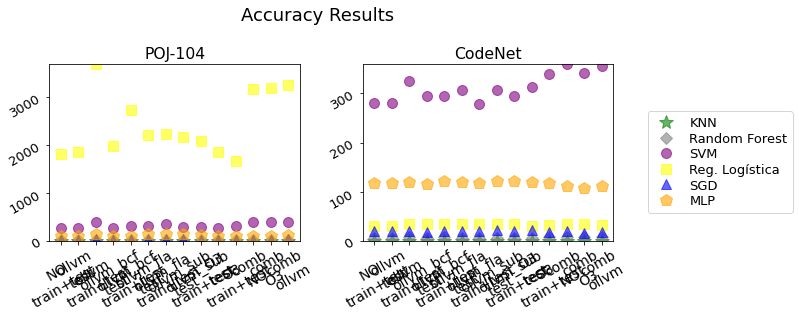

In [180]:
from IPython.display import display
import matplotlib.pyplot as plt
import pdfkit as pk
import pandas as pd
import numpy as np

poj = pd.read_csv("./data104.csv", skipinitialspace=True)
code = pd.read_csv("./codenet.csv", skipinitialspace=True)

fig, axs = plt.subplots(1,2,figsize=(9,4.5))

# plt.rcParams.update({'font.size': 14})
plt.rc('font', size=13)
# plt.rc('axes', labelsize=9)
plt.rc('xtick', labelsize=14)
plt.rc('figure', titlesize=18)

selectedCols = ["NO","te O3","tr+te O3","te ollvm","tr+te ollvm","te ollvm_fla","tr+te ollvm_fla","te ollvm_sub","tr+te ollvm_sub","te ollvm_bcf","tr+te ollvm_bcf","comb-te NO","comb-te O3","comb-te OLLVM", "type"]

def createAx(ax, df, metric, lim):
    sample = df[df["type"] == metric][np.concatenate([selectedCols, ["model"]])]
    sel = ["NO","te ollvm","tr+te ollvm","te ollvm_bcf","tr+te ollvm_bcf","te ollvm_fla", "tr+te ollvm_fla","te ollvm_sub","tr+te ollvm_sub","te O3","tr+te O3","comb-te NO","comb-te O3","comb-te OLLVM"]
    sel_labels = ["NO\ntrain+test", "ollvm\ntest", "ollvm\ntrain+test",  "ollvm_bcf\ntest", "ollvm_bcf\ntrain+test", "ollvm_fla\ntest", "ollvm_fla\ntrain+test", "ollvm_sub\ntest", "ollvm_sub\ntrain+test", "O3\ntest", "O3\ntrain+test","comb\nNO", "comb\nO3", "comb\nollvm"]
    alpha=0.6
    models = ["knn", "random_forest", "svm", "reg_logistica", "sgd", "mlp"]
    det = [("green", 15, "*"), ("grey", 8, "D"), ("purple", 10, "o"), ("yellow", 10, "s"), ("blue", 10, "^"), ("orange", 12, "p")]

    k = 0
    for m in models:
        d = det[k]
        s = sample[sample["model"] == m][np.concatenate([sel, ["model"]])]
        s = s[sel].T
        s.columns = range(1)
        ax.plot(sel_labels, s[0],alpha=alpha, color=d[0], ms=d[1], marker=d[2], linestyle="None")
        ax.set_ylim([0,lim])
        ax.tick_params(labelrotation=30)
        k += 1

metric="time"
createAx(axs[0], poj, metric, 3700)
createAx(axs[1], code, metric, 360)
fig.legend(["KNN", "Random Forest", "SVM", "Reg. Logística", "SGD", "MLP"], handleheight=0.6, labelspacing=0.2, loc="center left", bbox_to_anchor=(1, 0.5))
# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, ("KNN", "Random Forest", "SVM", "Reg. Logística", "SGD", "MLP"), loc='center left', bbox_to_anchor=(1, 0.5))

axs[0].set_title("POJ-104")
axs[1].set_title("CodeNet")

fig.suptitle("Accuracy Results")
# fig.xticks(rotation=20)

fig.tight_layout()
# plt.savefig("pdfs/comb_{}.pdf".format(metric), bbox_inches = 'tight')